In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns

In [2]:
opportunities = pd.read_csv("Entrenamieto_ECI_2020.csv")

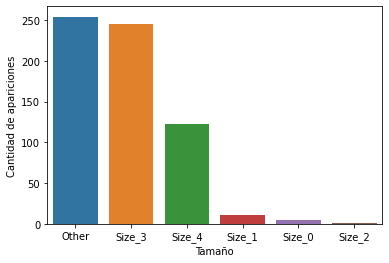

In [80]:
opportunities = opportunities[(opportunities["Size"]!="None")]
opportunities.drop_duplicates(subset="Opportunity_ID",inplace=True)
sizes = opportunities["Size"].value_counts().to_frame()
sizes = sizes.reset_index()
sizes = sizes.rename(columns={"index":"Tamaño","Size":"Cantidad de apariciones"})
sns.barplot(sizes.Tamaño, sizes["Cantidad de apariciones"])

# Veo ASP(dolar) promedio de cada size

In [95]:
aspBySize = opportunities[["Size","ASP_(converted)"]].groupby("Size").agg({"ASP_(converted)":"mean"})
aspBySize = aspBySize.reset_index()
aspBySize.rename(columns={"ASP_(converted)":"ASP(Dolar)", "Size":"Tamaño"}, inplace=True)
aspBySize 

,Tamaño,ASP(Dolar)
0,Other,0.344258
1,Size_0,0.376656
2,Size_1,0.347824
3,Size_2,0.310000
4,Size_3,0.356324
5,Size_4,0.364506


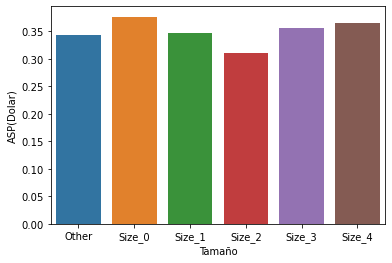

In [97]:
sns.barplot(x="Tamaño",y="ASP(Dolar)",data=aspBySize)
#No me dice nada esto

# Size vs Stage

In [99]:
sizesVsStage = opportunities.pivot_table(index="Size",columns="Stage",values="Opportunity_ID",aggfunc="count")
sizesVsStage["Total"] = opportunities["Size"].value_counts()
sizesVsStage["Closed Lost Percentage"] = sizesVsStage["Closed Lost"]/sizesVsStage["Total"]
sizesVsStage = sizesVsStage.reset_index()
sizesVsStage.rename(columns={"Closed Lost Percentage":"Porcentaje Closed Lost", "Size":"Tamaño"},inplace=True)
sizesVsStage

Stage,Tamaño,Closed Lost,Total,Porcentaje Closed Lost
0,Other,254,254,1.0
1,Size_0,5,5,1.0
2,Size_1,11,11,1.0
3,Size_2,1,1,1.0
4,Size_3,245,245,1.0
5,Size_4,122,122,1.0


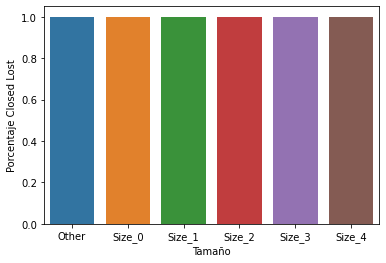

In [100]:
sns.barplot(x="Tamaño",y="Porcentaje Closed Lost",data=sizesVsStage)
#MUY FEO EL GRAFICO, PERO MUESTRA QUE TODOS SON CLOSED LOST

# Size vs Product Type

In [105]:
sizeVsProductType = opportunities[["Size","Product_Type","Opportunity_ID"]].groupby(["Size","Product_Type"]).agg({"Opportunity_ID":"count"})
sizeVsProductType.reset_index(inplace=True)
sizeVsProductType

,Size,Product_Type,Opportunity_ID
0,Other,None,5
1,Other,Other,226
2,Other,Product_Type_0,2
3,Other,Product_Type_1,6
4,Other,Product_Type_2,4
5,Other,Product_Type_3,10
6,Other,Product_Type_4,1
7,Size_0,Other,1
8,Size_0,Product_Type_1,4
9,Size_1,Product_Type_1,5


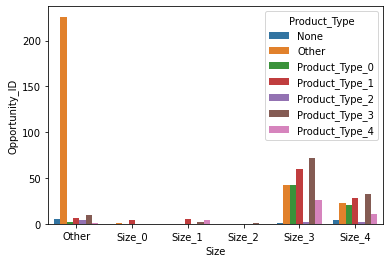

In [106]:
sns.barplot(x="Size",y="Opportunity_ID",hue="Product_Type",data=sizeVsProductType)